# Homework Assignment 1

### Basics and Principles of Radar Remote Sensing for Environmental Applications 2024

October 2024

In [2]:
import matplotlib.pyplot as plt
import pandas as pd #importing library for tables (dataframes)

import sys
import os

compiles_folder = os.path.join(os.getcwd(), 'source')
sys.path.append(compiles_folder)


Complete the following exercises. Provide your asnwers in a PDF (like the example given in moodle). Include in the document the questions and your answers with reasonable detail so that the problem solving process can be followed. Remember to include units when using formulas. The solutions should be clearly numbered, and in the order that they appear on this assignment.
Note: Might be easier first to write your answers in the Jupyter Notebook and later pass them to a PDF. But, REMEMBER: you must submit the PDF NOT the Jupyter Notebook!!

### 1 SAR Systems

F-SAR is an airborne system developed and operated by the German Aerospace Center. It is a flexible SAR system which can be operated at different frequencies. Consider a scenario where it is flown with the following specifications

In [3]:
#check the data in the table:
from source.a1_exercise1_sarparams import df 

df

,Parameter,Value,Unit
0,Sensor type,Airborne SAR,-
1,Frequency band,X-band,-
2,Central frequency,12,GHz
3,Bandwidth,150,MHz
4,Incidence angle (near-range),40,deg
5,Incidence angle (far-range),55,deg
6,Sensor altitude,2.4,km
7,Sensor velocity,49,m/s
8,Antenna aperture,0.55,m


Compute the following parameters of the system, add the formula for each case and the resulting value

In [4]:
#import useful libraries
from scipy.constants import c #speed of light
import numpy as np

Wavelength:
-  $ \lambda =$

In [5]:
#write your code here (DO NOT FORGET UNITS in your answer)
frequency = float(df.loc[df['Parameter'] == 'Central frequency', 'Value'].values[0]) * 1e9 #in Hz

wavelength = c / frequency #in meters

print(f"Wavelength: {wavelength:.4f} m")

Wavelength: 0.0250 m


Azimuth Resolution:
- $\delta_{az}= $

In [6]:
#write your code here (DO NOT FORGET UNITS in your answer)


Azimuth_resolution = float(df.loc[df['Parameter'] == 'Antenna aperture', 'Value'].values[0])/2 #in meters

print(f"Azimuth resolution: {Azimuth_resolution:.4f} m")

Azimuth resolution: 0.2750 m


Ground range resolution (both edges of swath):
- $\delta_{rg}= \frac {c}{2B \cdot sin(\theta)}$

In [9]:
#write your code here (DO NOT FORGET UNITS in your answer)
# load the params from the table
Bandwidth = float(df.loc[df['Parameter'] == 'Bandwidth', 'Value'].values[0]) * 1e6 #in Hz
incidence_angle_near = float(df.loc[df['Parameter'] == 'Incidence angle (near-range)', 'Value'].values[0]) #in degrees
incidence_angle_far = float(df.loc[df['Parameter'] == 'Incidence angle (far-range)', 'Value'].values[0]) #in degrees


range_res = c/(2*Bandwidth) #in meters

range_res_near = range_res/np.sin(np.deg2rad(incidence_angle_near)) #in meters
range_res_far = range_res/np.sin(np.deg2rad(incidence_angle_far)) #in meters

print(f"Range resolution (near-range): {range_res_near:.4f} m")
print(f"Range resolution (far-range): {range_res_far:.4f} m")

Range resolution (near-range): 1.5546 m
Range resolution (far-range): 1.2199 m


b) Describe in max. 2 lines how the following parameters change  (increase/decrease/stay) for the following cases:
- CASE 1: if the sensor flies at lower altitude and the incident angle is the same.
- CASE 2: if the sensor flies at higher altitude and the incident angle increases
- CASE 3: if wavelength and antenna length increase

You can use the plots below to answer the question or simply look into the equations. 

 +: increases, -: decreases, 0: remains the same
---------
| | Synthetic Apperture Length | Az. Angular Resolution | Azimuth Res. | Ground Res|
|---|-------------------------|------------------------|--------------|-----------|
 Case 1   | -                       | +                    | 0            | 0           |
| Case 2   | +                       | -                    | 0            | +           |
| Case 3   | -                       | +                    | +            | 0           |


In [10]:
from source.a1_exercise1_sarparams import get_sar_params 


# Display the interactive plot
interactive_plot = get_sar_params()
display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, description='lambda [m]', layout=Layout(width='500px'), max=1.0, …

c) We have a SAR system with the following specifications:
- $\delta_{gr} = 1.5m$
- $\theta_{SA@500\,km} = 0.001\,deg$
- $L_{SA@1000\,km} = 65\,km$

Which are the values for the wavelength $\lambda$, the incident angle $\theta$, the antenna length $d_{a}$ if the bandwith is $BW=350\,MHz$? 

Provide the steps you took to obtain the results.

In [ ]:
#your answer

Consider that the SAR system parameters ($\lambda, \theta, d_a, BW$) calculated in c) are used for designing a satellite SAR mission. 

The planetary dynamics team is designing the satellite orbit. You have heard that they settled down for a LEO orbit of $900\,km$ height.
As member of the systems engineering group, you know that one of the engineering constraints of the SAR mission is that the illumination time does not exceed $3.5\,s$.
Before anyone puts in more time and resources, you want to make sure that both planetary dynamics and SAR team's requirements agree.

You decide to do some quick calculations using the formulas of circular orbital motion:
$$ v_{satellite} = \sqrt{\frac{GM_{Earth}}{r}}$$
Where $G$ is the gravitational constant ($G = 6.673\cdot 10^{-11}N\cdot \, m^2/kg^2$), $M_{Earth}$ is the mass of Earth ($M_{Earth} = 5.98\cdot 10^{24}\, kg$) and $r$ is the radius of the orbit. Note: Earth radius $R_{Earth} =  6370\,km$.


d) Check if the proposed LEO orbit complies with the illumination time requirement. In case it does not meet the requirements, calculate the height of the new orbit.

Hint: Using the plots above with the results obtained in c) might be of help.


Provide the steps you follow to calculate your result.


In [ ]:
#your answer

### 2 SAR Image Analysis

In the figure below, you can see the measured intensity from a TerraSAR-X acquisition over Wuhan.

In [ ]:
import matplotlib.image as mpimg

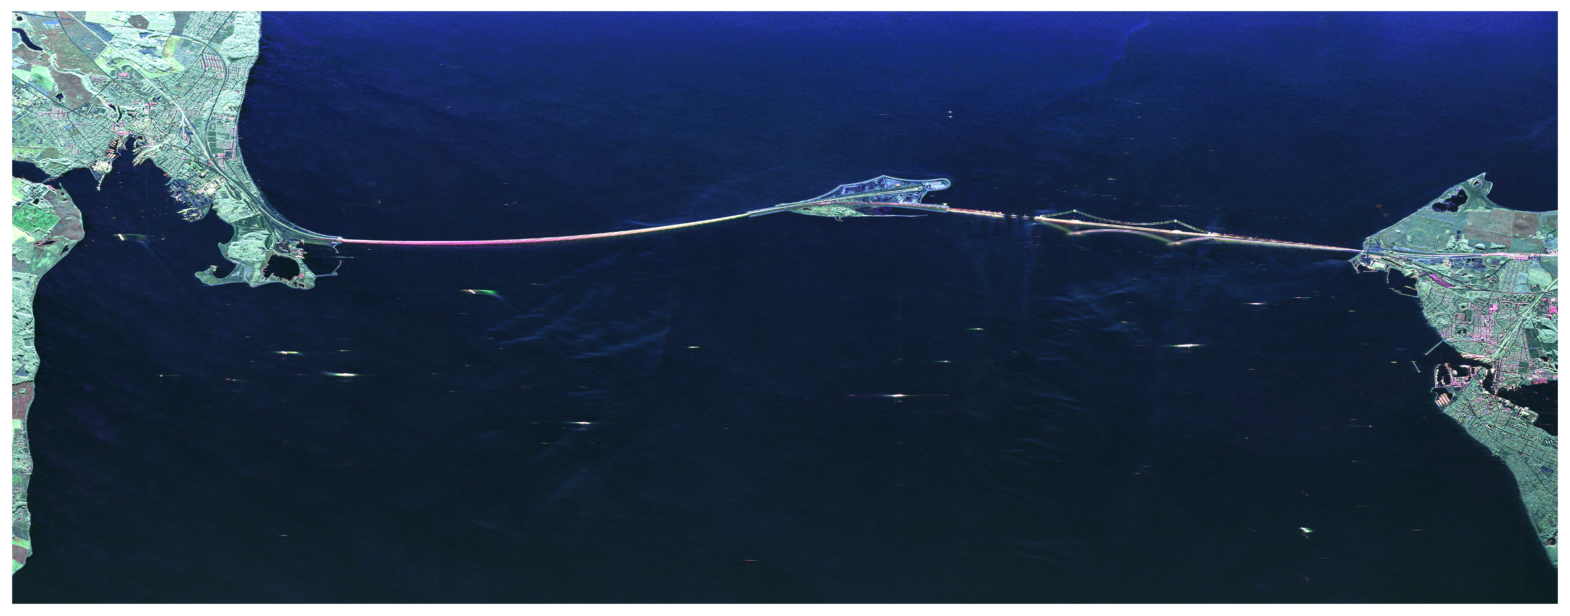

In [ ]:
# Load the image
img = mpimg.imread(os.path.join('source','bridge_SAR.png'))

# Display the image
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')  # Optional: Hide the axis
plt.show()

#### Image zoom in

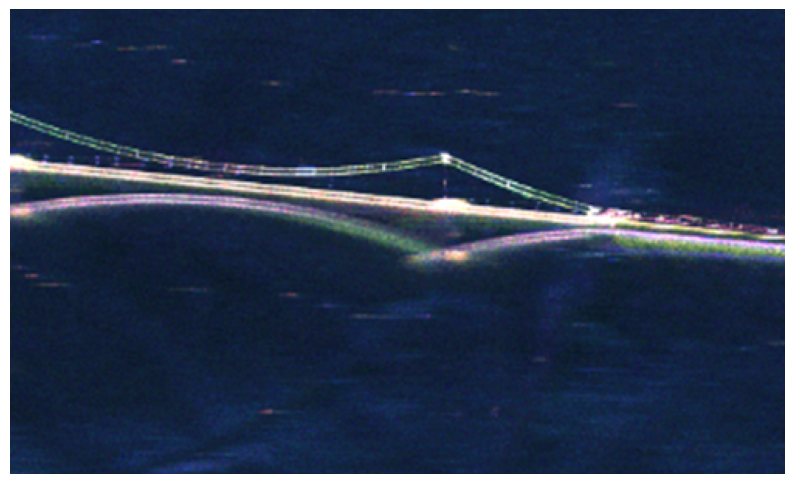

In [ ]:
# Display the image
plt.figure(figsize=(10,10))
plt.imshow(img[500:800,3000:3500])
plt.axis('off')  # Optional: Hide the axis
plt.show()

a) Which direction (top -> bottom, bottom -> top, left -> right or right -> left) in this picture is the range direction of the aquisition? Explain your choice. Hint: Think of the geometrical effects that were discussed in the lecture, and try to identify which ones are happening in the scene.

In [ ]:
#your answer

b) Explain the scattering paths on the bridge. Hint: the signal does not always take the direct path between the target and the sensor!  Describe it in about three lines.

In [ ]:
#your answer

### 3 Decibels & SNR

Decibels are often used in telecommunications and radar to describe relative increases or decreases in signal amplitude along the signal’s path. If we use a signal amplifier, we can define a property called voltage-gain (referred in this exercise as simply gain) as 
$$ G = \frac{A_{out}}{A_{in}} $$

where $A_\text{in}$ and $A_{out}$ are the incoming and outcoming signal intensity respectively. More frequently, the gain is not expressed in natural units, but in decibels:

$$ G_\text{dB} = 20 \log_{10} G = 20 \log_{10}({\frac{A_{out}}{A_{in}}}) $$

Following the same reasoning, the ratio between the signal Power and the noise Power is called Signal-to-Noise ratio ($SNR$). It is defined as:
$$ SNR = \frac{P_{signal}}{P_{noise}}$$
In case of measuring the signal in volts (V) or amperes (A), that is to say, in terms of amplitude instead of power, the $SNR$ is expressed as:
$$ SNR = \Big(\frac{A_{signal}}{A_{noise}}\Big)^2$$

And when expressed in decibels:

$$ SNR_{dB} = 10\log_{10}(\frac{P_{signal}}{P_{noise}}) = 20\log_{10}(\frac{A_{signal}}{A_{noise}}) $$

Note the exponent $2$ expressed as a factor $2$ in the decibel formula.

#### Problem

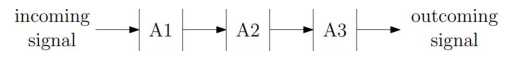

In [ ]:
# Load the image
img = mpimg.imread(os.path.join('source','gain_blocks.JPG'))

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Hide the axis
plt.show()

Problem description: We are part of the electrical engineering team designing a SAR system. After a meeting with the team of SAR scientists we arrived to the conclusion that the signal level is too low, thus, inducing to errors in their analysis. They have asked us to amplify the signal. So, we designed a concept of the amplification system. As we are rather tight on budget, we decided to use a maximum of three similar-priced amplifiers ($A_1$, $A_2$ and $A_3$) connected in chain (as depicted in the image above). 

After making some tests, we realise that our design is a bit flawed and there is an external signal leaking in the form of noise ($N$) that mixes with the incoming signal $I$. As the amplifiers are high-tech they have an AI-system that separates the actual signal from the noise. After separating both signals, the AI applies an amplification factor (gain) to the input signal and an attenuation factor to the noise signal. The specific values for each gain and attenuation are usually provided by the manufacturer in their specifications but unfortunately we do not have any manual and they are taking too long to reply. So, we decided to make some tests and figure it out ourselves.


Discussing with our colleagues, we modelled the amplification of the signal as:
$$ I_1 = G_1\cdot I_0$$
$$ I_2 = G_2\cdot I_1$$
$$ I_3 = G_3\cdot I_2$$
then,
$$ I_3 = G_1\cdot G_2 \cdot G_3 \cdot I_0$$
where $I_0$ is the incoming signal and $I_3$ is the outgoing signal. The amounts $G_1, G_2, G_3$ are the amplifier gains stated by the manufacturer.

Then, we established that the AI applies an "attenuation weight" on the amplified noise signal $N$. The resulting noise after passing through all amplifiers is modelled as:
$$ N_1 =  G_1\cdot w_1 \cdot N_0$$
$$ N_2 =  G_2\cdot w_2 \cdot N_1$$
$$ N_3 =  G_3\cdot w_3 \cdot N_2$$
then,
$$ N_3 = G_1\cdot G_2 \cdot G_3 \cdot w_1\cdot w_2 \cdot w_3 \cdot N_0$$
$N_0$ is initial noise and $N_3$ is the final noise after going through the 3 amplifiers. Being $w_1, w_2, w_3$ the corresponding "attenuation weights" the AI is applying to compensate the gain. 


The team leader has requested as to calculate the values for the gains $G_1, G_2, G_3$ and the values of $w_1, w_2, w_3$.

For doing so we decide to use an oscilloscope in lab. Ideally, we will test each amplifier one by one, measuring the signal at input and the signal on the output and then just straight-forward calculating the gain. However, the only circuit available for testing needs to be filled with 3 amplifiers (like in the picture above). Luckily, we have a spare amplifier in the lab of known gain, $G_{dummy}$, that we can even modulate.

We come up with a solution, even though it is a bit tedious: reading the output signal three times (see picture below):
- when the spare amplifier is at the first position (TEST 1)
- when the spare amplifier is in the middle position (TEST 2)
- when the spare amplifier is at the last position (TEST 3)



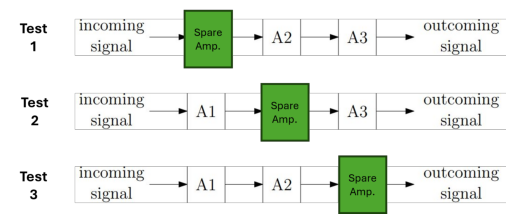

In [ ]:
# Load the image
img = mpimg.imread(os.path.join('source','test1_test2_test3.png'))

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Hide the axis
plt.show()

Your colleague has requested you to fill a table for each measurement. The table should contain the value that you used for the spare amplifier, the value of the input signal, output signal, noise input signal, noise output signal (in mV) and their ratio in dB. Here it is a dummy example of how it should look like:




In [ ]:
column_names = ['G1', 'G2', 'G3', 'I_in', 'I_out', 'N_in', 'N_out', '20log(I_out/I_in)','20log(N_out/N_in)']

data = [[ "Dummy value: 2dB", "unknown", "unknown", "1","10","1","10","20","20"]]
# Create an empty DataFrame with only the column names
df = pd.DataFrame(data, columns=column_names)
df

,G1,G2,G3,I_in,I_out,N_in,N_out,20log(I_out/I_in),20log(N_out/N_in)
0,Dummy value: 2dB,unknown,unknown,1,10,1,10,20,20


Please, add the tables in the pdf with your solutions. Substitute the question marks "??" with the values you found.

He also left instructions to use the oscilloscope:

The oscilloscope either shows the input signal or the output signal after the three gains.
With the cursor you can select the specific "x value" (in miliseconds). 
The legend will show you the amplitude of the signal and the noise at the chosen time.

It is possible to change the value of the spare amplifier. You can do so by using the "Dummy Gain" slider.

#### TEST 1 -- when the spare amplifier is in the position of A1

In [ ]:
#fill the table:
data = [[ "Dummy value: ??dB", "unknown", "unknown", "??","??","??","??","??","??"]]

# Create an empty DataFrame with only the column names
df = pd.DataFrame(data, columns=column_names)

df

,G1,G2,G3,I_in,I_out,N_in,N_out,20log(I_out/I_in),20log(N_out/N_in)
0,Dummy value: ??dB,unknown,unknown,??,??,??,??,??,??


In [ ]:
from source.a1_exercise3_snr import get_oscilloscope_2screens_g1dummy 


# Display the interactive plot
interactive_plot = get_oscilloscope_2screens_g1dummy()
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='Dummy Gain [dB]', layout=Layout(width='500px'), max=…

#### TEST 2 -- when the spare amplifier is in the position of A2

In [ ]:
#fill the table:
data = [[ "unknown", "Dummy value: ??dB","unknown", "??","??","??","??","??","??"]]

# Create an empty DataFrame with only the column names
df = pd.DataFrame(data, columns=column_names)

df

,G1,G2,G3,I_in,I_out,N_in,N_out,20log(I_out/I_in),20log(N_out/N_in)
0,unknown,Dummy value: ??dB,unknown,??,??,??,??,??,??


In [ ]:
from source.a1_exercise3_snr import get_oscilloscope_2screens_g2dummy


# Display the interactive plot
interactive_plot = get_oscilloscope_2screens_g2dummy()
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='Dummy Gain [dB]', layout=Layout(width='500px'), max=…

#### TEST 3 -- when the spare amplifier is in the position of A3

In [ ]:
#fill the table:
data = [[ "unknown","unknown","Dummy value: ??dB", "??","??","??","??","??","??"]]

# Create an empty DataFrame with only the column names
df = pd.DataFrame(data, columns=column_names)

df

,G1,G2,G3,I_in,I_out,N_in,N_out,20log(I_out/I_in),20log(N_out/N_in)
0,unknown,unknown,Dummy value: ??dB,??,??,??,??,??,??


In [ ]:
from source.a1_exercise3_snr import get_oscilloscope_2screens_g3dummy 


# Display the interactive plot
interactive_plot = get_oscilloscope_2screens_g3dummy()
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='Dummy Gain [dB]', layout=Layout(width='500px'), max=…

a) After filling the 3 tables, calculate the values of $G_1,G_2,G_3$. Provide all the calculation steps on the pdf.

In [ ]:
#answer

b) After obtianing the gains, calculate the values of $w_1, w_2, w_3$. Warning: the spare amplifier has no AI modifying the final gain. In other words, you can consider $w=1$ when using the spare amplifier. Provide all the calculation steps on the pdf.

In [ ]:
#answer

c) How did you solve the system? Using dB or natural units? If you solved it using dB, state the problem in natural units and viceversa (do not solve it, just state the equations!!!). Which system is easier to solve? What is the advantage of using dB? Please explain it in about two lines.

In [ ]:
#asnwer

Our team leader wants to make sure we are compliant with the requirements demanded by the SAR scientists. He is asking you if the $SNR$ is at least 15dB.


You are bit confused on how to do that task with the oscilloscope, so you ask your colleague. He tells you that by getting an approximate value of both signal amplitudes on the screen and applying the theory, your estimation should be good enough. 

d) Using the Upper and Lower cursor of the oscilloscope provided in the image below, estimate the $SNR$ of the signal BOTH at input and at the output. Set $G_1, G_2, G_3$ to the values that you obtained in question a). Is now the system compliant with the SAR team requirements? Provide the answer on the pdf, also with your calculations.

In [ ]:
#answer

In [ ]:
from source.a1_exercise3_snr import get_oscilloscope_1screen


# Display the interactive plot
interactive_plot = get_oscilloscope_1screen()
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='G1 [dB]', max=20.0, step=1.0), FloatSlider(value=0.0…

### 4 Complex Numbers

Synthetic aperture radar is a coherent imaging system, which means that we detect both amplitude and phase of the incoming signal. In the resulting image, for each pixel this amplitude and phase is encoded as a complex number
$$ z = A e^{i\phi} $$
where $A\geq 0$ and $\phi\in <0;2\pi)$ are the number's amplitude and phase respectively, and $i=\sqrt{-1}$ is the imaginary unit.

For applications such as polarimetry and interferometry, the notation above ($z = A e^{i\phi}$) is more useful than splitting the complex number into the real and imaginary part ($z = a + bi$). This is because we often perform mathematical operations on two complex numbers and are interested in the phase or amplitude of the final result. 

a) Given two complex numbers $z_1$, $z_2$, choose which operation (multiplication, division, multiplication by conjugate, etc.) has been carried out to obtain the resulting vectors $A, B, C, D, E$. The 5 different possible options can be chosen on the dropdown of the widget. Please, name the vector with the corresponding operation.

In [ ]:
from source.a1_exercise4_complexnumbers import get_complex_plot

interactive_plot = get_complex_plot()
display(interactive_plot)

interactive(children=(FloatSlider(value=2.0, description='Amp Z1:', max=3.0, min=1.0), FloatSlider(value=45.0,…

b) After solving question a), it should be clear what happens to the phase and amplitude when performing an operation between two complex numbers $z_1 = A_1e^{i\phi_1}$ and $z_2 = A_2e^{i\phi_2}$. Fill the table below for a general case and for the specific values you used in exercise a). If you did it correctly, results will hold.

In [ ]:
from source.a1_exercise4_complexnumbers import df_complex

# Display the DataFrame
df_complex

,Operation,Notation,Resulting amplitude,Resulting phase
0,Multiplication,z_1z_2,x,x
1,Division,z_1 / z_2,x,x
2,Multiplication by complex conjugate (1),z_1 z_2*,x,x
3,Multiplication by complex conjugate (2),z_2 z_1*,x,x
4,Multiplication by complex conjugate of itself,z_1 z_1*,x,x


c) As we have seen, a complex number can be expressed as a "compact form" using amplitude and phase or an "explicit form" using sine and cosine:
$$z = A e^{i\phi} \leftrightarrow z = A(cos\phi + isin\phi)$$
Proof using the trigonometric form of a complex number that the resulting phase of the multiplication of two complex numbers $z_1$ and $z_2$ is the sum of their respective phases. In other words, that $z_1\cdot z_2 = A_1\cdot A_2 e^{i(\phi_1+\phi_2)}$, where $z_1 = A_1e^{i\phi_1}$ and $z_2 = A_2e^{i\phi_2}$.

Do not use ChatGPT (or similar) to provide this answer. State clearly the steps you follow in your proof.

Hint: use trigonometric identities that relate sine and cosine multiplication with the sum of their angles.


In [ ]:
#Write your answer

### 5 Penetration

Make a list of factors that influence the penetration of electromagnetic waves into a wet snowpack.  Please describe it with your own words and write it on the pdf